#### 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않았다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.

#### 독립성
- 2개 이상의 확률변수가 서로 영향을 기치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
    * 무상관성보다 독립성이 더 강한 개념
    * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import scipy as sp
from scipy.special import factorial
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리
plt.style.use('seaborn')

In [30]:
linestyles = ['-','--',':','-.']

def E(XY,g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])


In [3]:
# 불공정한 주사위 (교재 p130)
x_set = np.arange(1,7)
y_set = np.arange(1,7)

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441

XY = [x_set, y_set, f_XY]

In [4]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인 것을 알 수 있음
Cov(XY)

-8.326672684688674e-17

In [5]:
# 무상관인 2개의 확률변수 생각해보자
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0

XY = [x_set, y_set, f_XY]

In [6]:
# 공분산은 0이다.
Cov(XY)

0.0

In [7]:
# 하지만 곱법칙이 성립하지 않으므로 둘은 독립이 아니다.
f_X(0) * f_Y(0), f_XY(0,0)

(0.1111111111111111, 0.3333333333333333)

In [ ]:
# 곱법칙 만족 <-> 독립 -> 공분산 0

## 합의 분포

- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ,... + X_n$ 이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수 있음

In [8]:
# 정규분포의 합의 분포
# 서로 독립인 X ~ N(1,2), Y ~ N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0038158544596536, 4.983843284715681)

재생성: 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

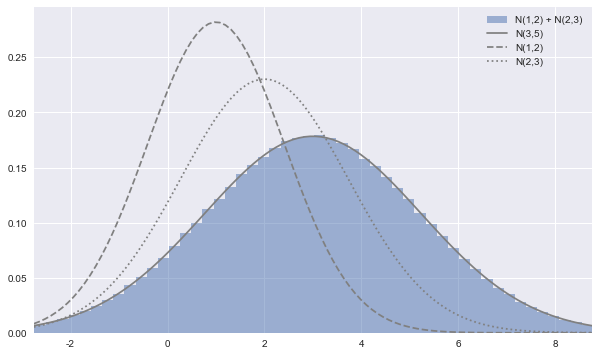

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3,np.sqrt(5))
xs = np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1,2) + N(2,3)')
ax.plot(xs,rv.pdf(xs),label='N(3,5)',color='gray')
ax.plot(xs,rv1.pdf(xs),label='N(1,2)',ls = '--',color='gray')
ax.plot(xs,rv2.pdf(xs),label='N(2,3)',ls=':',color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

포아송 분포의 합의 분포
- 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따르고 X + Y ~ Poi(7)이 된다.
- n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.

In [31]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(7.001782, 6.987682824475998)

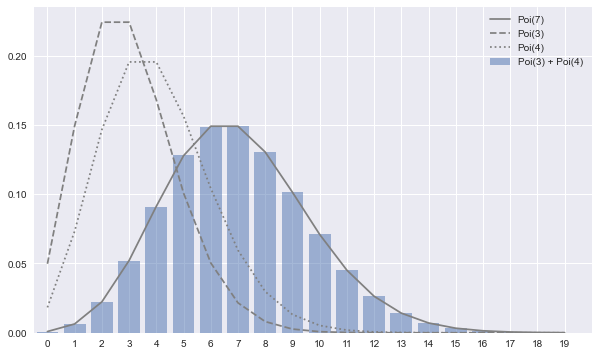

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), density=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs,rv.pmf(xs),label='Poi(7)',color='gray')
ax.plot(xs,rv1.pmf(xs),label='Poi(3)',ls = '--',color='gray')
ax.plot(xs,rv2.pmf(xs),label='Poi(4)',ls=':',color='gray')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

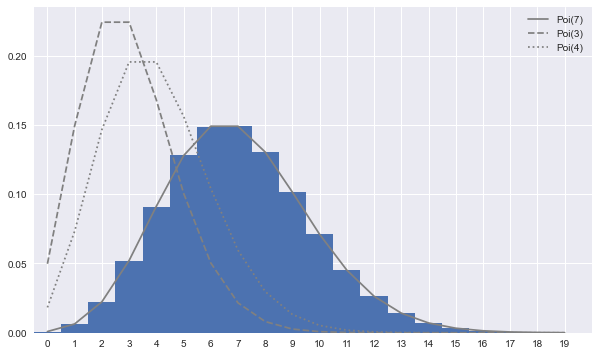

In [33]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)

ax.hist(sum_sample, bins=20, range=(-0.5,19.5), density=True)
ax.plot(xs,rv.pmf(xs),label='Poi(7)',color='gray')
ax.plot(xs,rv1.pmf(xs),label='Poi(3)',ls = '--',color='gray')
ax.plot(xs,rv2.pmf(xs),label='Poi(4)',ls=':',color='gray')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

베르누이 분포의 합의 분포
- 베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다.

In [18]:
# 성공확률이 0.3인 베르누이 분포를 따르는 확률변수 10개에 대하여 백만번 표본을 추출하여 표본평균과 표본분산을 산출
# 표본 데이터가 하나이면 베르누이분포가 되고 표본 데이터가 여럿이면 이항분포가 된다.
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999808, 2.1023159631359998)

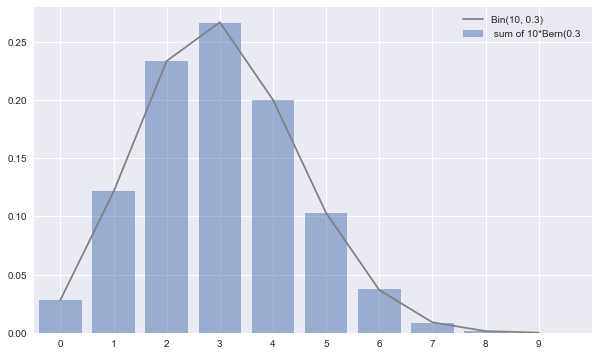

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), density=True)

ax.bar(xs, hist, alpha=0.5, label=' sum of 10*Bern(0.3) ')
ax.plot(xs,rv.pmf(xs),label='Bin(10, 0.3)',color='gray')
ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$

In [41]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9996987769240696, 0.19998712280595715)

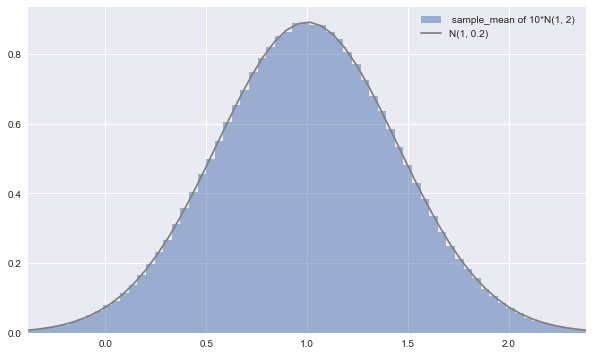

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean,np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999),rv.isf(0.001),100)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label=' sample_mean of 10*N(1, 2) ')
ax.plot(xs,rv_true.pdf(xs),label='N(1, 0.2)',color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

In [8]:
# [과제] 포아송 분포의 표본평균 분포는 포아송 분포를 따르지 않고 좌우대칭인 정규분포에 근사한 형태가 됨을 확인
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.0000614999999993, 0.29966004621774983)

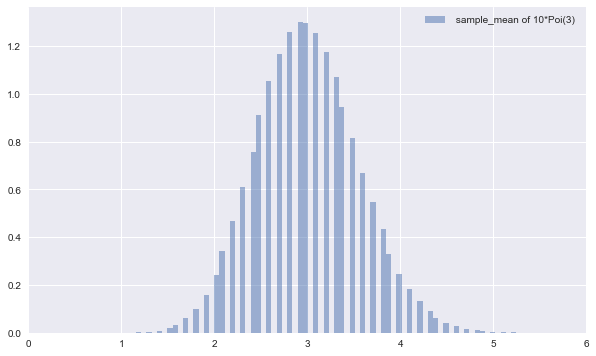

In [22]:
# 중심극한정리에 의하여 좌우대칭인 산 모양의 정규분포에 근사한다.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label=' sample_mean of 10*Poi(3) ')

ax.legend()
ax.set_xlim(0,6)
plt.show()

합의 분포와 표본평균의 분포
- 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 있다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포 조차도 그 형태를 유지할 수 없다.
- 원래 분포가 무엇이었든지 간에 표본평균의 분포는 정규분포에 근사한다.

#### 중심극한정리
- 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고 기댓값이 $\mu$, 분산이 ${\sigma}^2$인 확률분포를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}$의 분포는 정규분포 $N(\mu,{\sigma}^2)$에 가까워진다.

In [47]:
# [과제] 중심극한정리를 입증하세요.
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l,np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

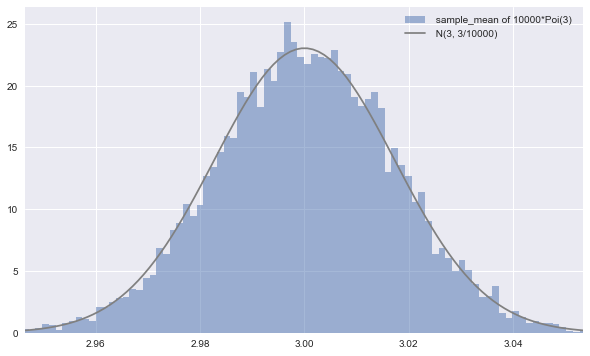

In [48]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label=' sample_mean of 10000*Poi(3) ')
ax.plot(xs,rv_true.pdf(xs),label=' N(3, 3/10000) ', color = 'gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

#### 대수의 법칙
- 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고 기댓값이 $\mu$, 분산이 ${\sigma}^2$일 것 같은 확률분포를 따를 때, n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [32]:
# [과제] sample_size의 변화에 따라 표본평균이 
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp],axis=0) for sp in space]).T

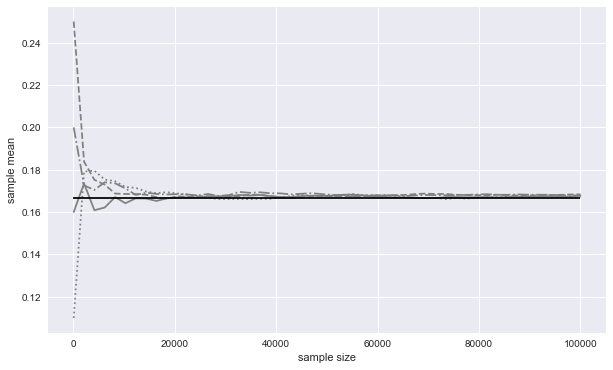

In [35]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p,-1,n,'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()